In [30]:
#3
import pandas as pd

df = pd.read_csv('titanic.csv')
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)
df.head(10)
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


# Check data types of each column
data_types = df.dtypes
print("Data Types:")
print(data_types)

# Convert categorical variables to appropriate data types
df['Survived'] = df['Survived'].astype('bool')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')


df['Age'].fillna(df['Age'].median(), inplace=True)
df['Survived'].fillna(df['Survived'].mode()[0], inplace=True)
df['Pclass'].fillna(df['Pclass'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(['Cabin'], axis=1, inplace=True)
df.dropna(subset=['Fare'], inplace=True)  # Drop rows with missing Fare values

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])





df.head(10)

Duplicate Rows:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_encoded
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
5,6,False,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,1
6,7,False,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1
8,9,True,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0
9,10,True,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0


In [31]:
#1
import pandas as pd

titanic_data = pd.read_csv('titanic.csv')
data_types = {}  

nominal_type_of_data = ['Name', 'Sex', 'Ticket', 'Cabin','Survived','Embarked']
ordinal_type_of_data = ['Pclass','PassengerId']
interval_type_of_data = ['Age']
ratio_type_of_data = ['Fare', 'SibSp', 'Parch']

for feature in nominal_type_of_data:
    data_types[feature] = 'Nominal'

for feature in ordinal_type_of_data:
    data_types[feature] = 'Ordinal'

for feature in interval_type_of_data:
    data_types[feature] = 'Interval'

for feature in ratio_type_of_data:
    data_types[feature] = 'Ratio'

for feature, data_type in data_types.items():
    print(feature,':', data_type)


Name : Nominal
Sex : Nominal
Ticket : Nominal
Cabin : Nominal
Survived : Nominal
Embarked : Nominal
Pclass : Ordinal
PassengerId : Ordinal
Age : Interval
Fare : Ratio
SibSp : Ratio
Parch : Ratio


In [32]:
#2
def calculate_summary_statistics(data):
    summary_stats = {}
    for column in data.columns:
        if data[column].dtype in ['int64', 'float64']:
            mean = data[column].mean()
            median = data[column].median()
            mode = data[column].mode().values[0]  
            sd = data[column].std()
            value_range = data[column].max() - data[column].min()

            summary_stats[column] = {
                'Mean': mean,
                'Median': median,
                'Mode': mode,
                'Standard Deviation': sd,
                'Range': value_range
            }
    
    return summary_stats
summary_statistics = calculate_summary_statistics(df)
for feature, stats in summary_statistics.items():
    print(f'\n{feature} Summary Statistics:')
    for stat, value in stats.items():
        print(f'{stat}: {value}')



PassengerId Summary Statistics:
Mean: 446.0
Median: 446.0
Mode: 1
Standard Deviation: 257.3538420152301
Range: 890

Age Summary Statistics:
Mean: 29.36158249158249
Median: 28.0
Mode: 28.0
Standard Deviation: 13.019696550973194
Range: 79.58

SibSp Summary Statistics:
Mean: 0.5230078563411896
Median: 0.0
Mode: 0
Standard Deviation: 1.1027434322934275
Range: 8

Parch Summary Statistics:
Mean: 0.38159371492704824
Median: 0.0
Mode: 0
Standard Deviation: 0.8060572211299559
Range: 6

Fare Summary Statistics:
Mean: 32.204207968574636
Median: 14.4542
Mode: 8.05
Standard Deviation: 49.693428597180905
Range: 512.3292


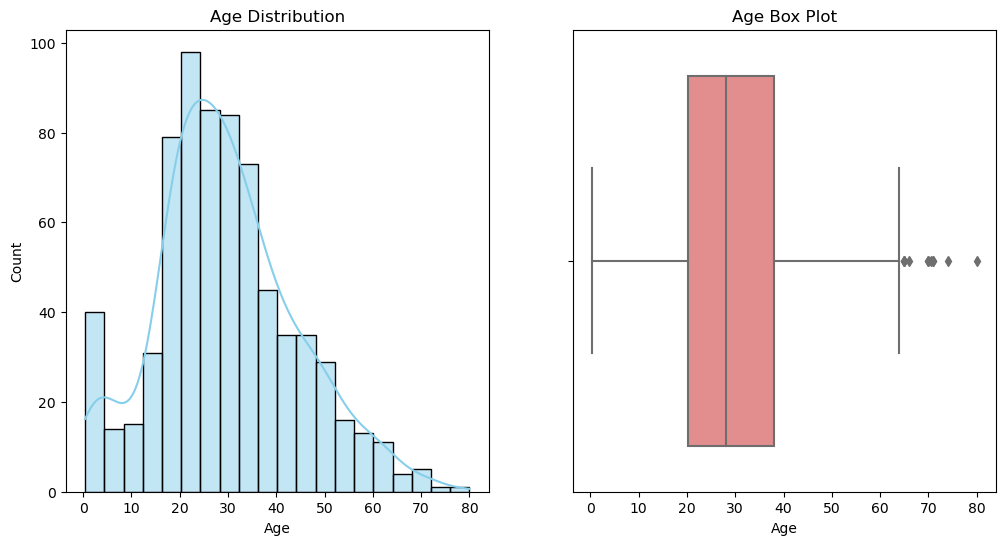

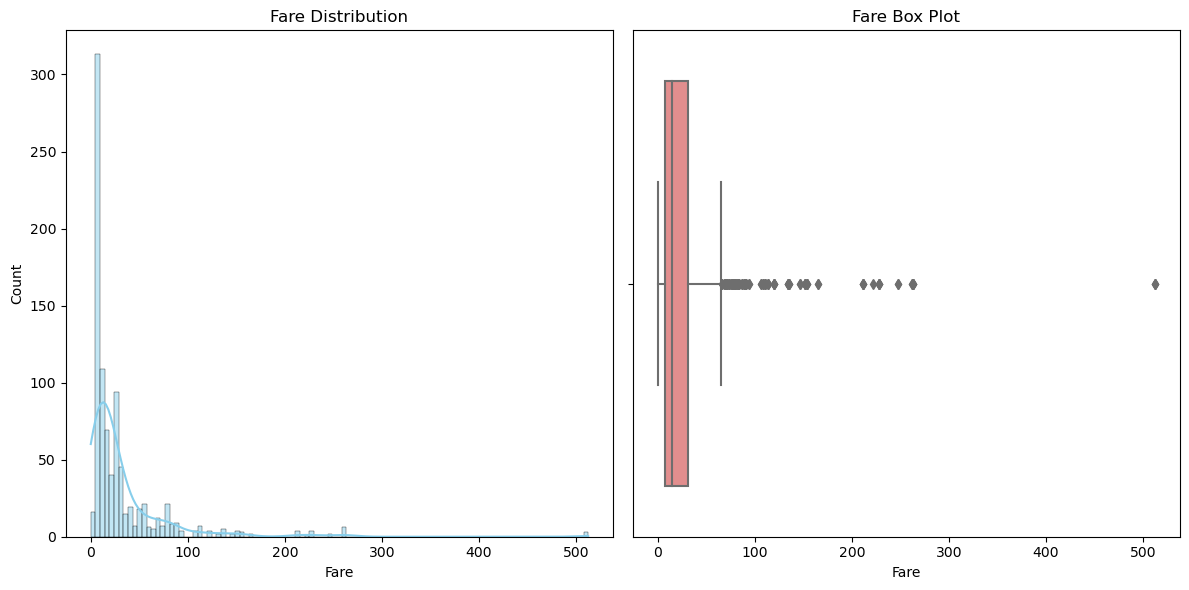

In [12]:
#4
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the provided snippet

# Set up subplots for Age and Fare
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot histogram and box plot for 'Age'
sns.histplot(df['Age'], kde=True, ax=axes[0], color='skyblue')
sns.boxplot(x=df['Age'], ax=axes[1], color='lightcoral')

axes[0].set_title('Age Distribution')
axes[1].set_title('Age Box Plot')

# Plot histogram and box plot for 'Fare'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(df['Fare'], kde=True, ax=axes[0], color='skyblue')
sns.boxplot(x=df['Fare'], ax=axes[1], color='lightcoral')

axes[0].set_title('Fare Distribution')
axes[1].set_title('Fare Box Plot')

plt.tight_layout()
plt.show()


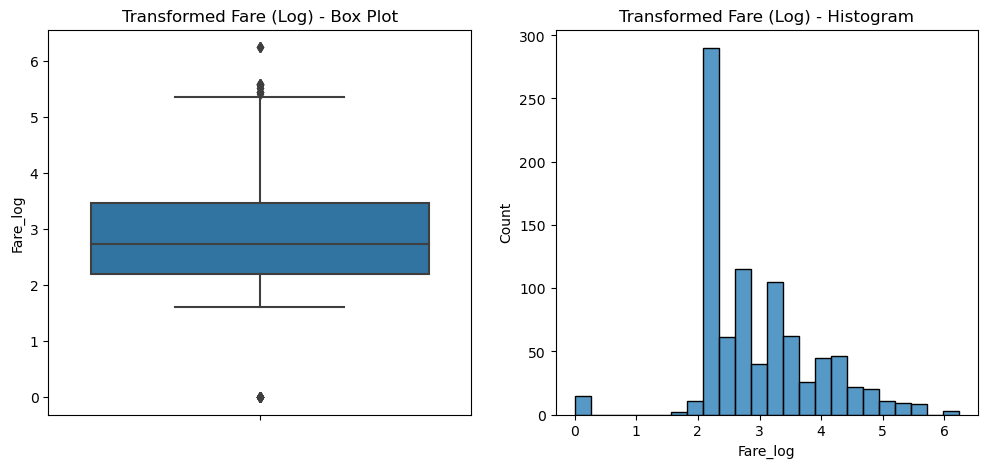

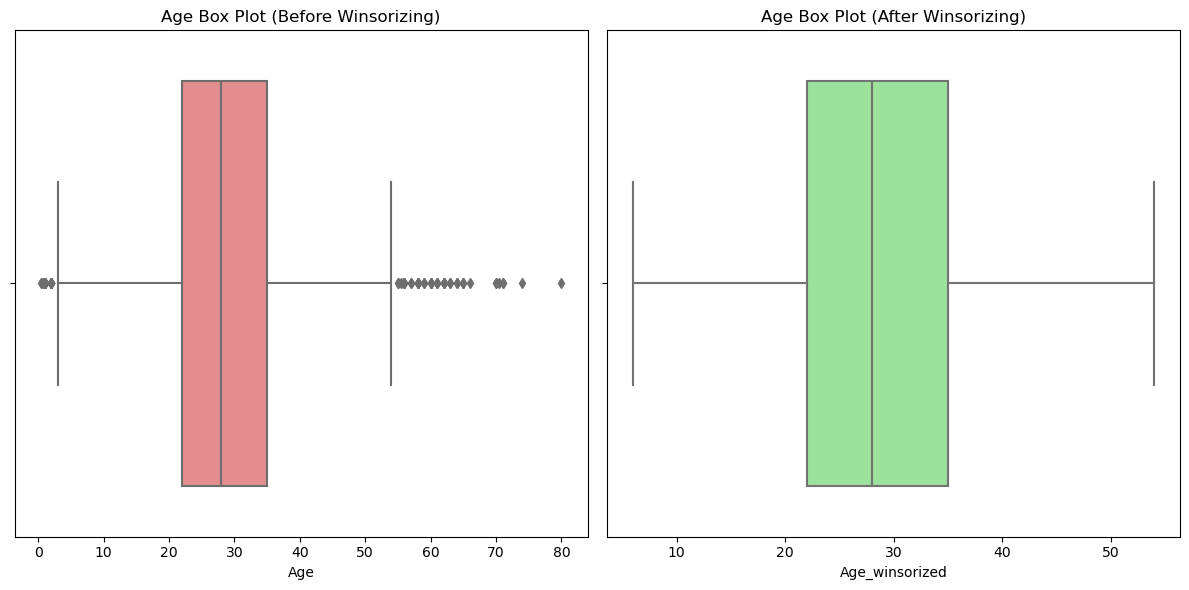

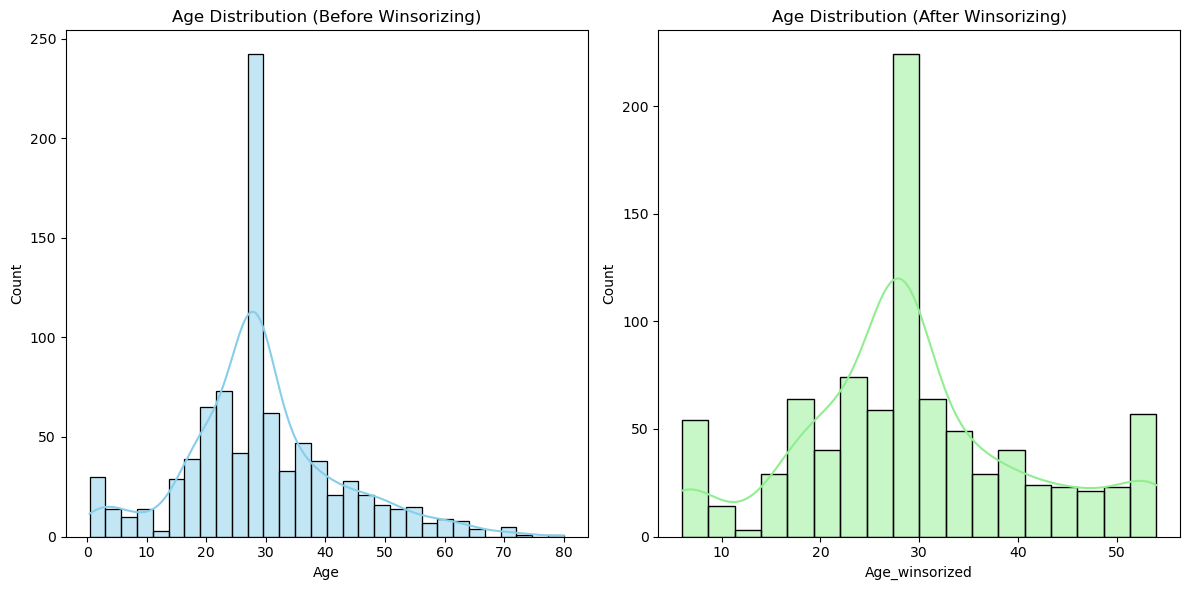

In [33]:
#5
# Example of log transformation for "Fare" variable
import numpy as np

df['Fare_log'] = np.log1p(df['Fare'])

# Create new box plot and histogram for "Fare_log"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Box plot
sns.boxplot(data=df, y='Fare_log', ax=axes[0])
axes[0].set_title('Transformed Fare (Log) - Box Plot')

# Histogram
sns.histplot(df['Fare_log'], ax=axes[1])
axes[1].set_title('Transformed Fare (Log) - Histogram')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to winsorize a column
def winsorize(series, lower_percentile, upper_percentile):
    lower_limit = np.percentile(series, lower_percentile)
    upper_limit = np.percentile(series, upper_percentile)
    return np.clip(series, lower_limit, upper_limit)

# Winsorize the 'Age' column (replace values below 5th percentile with 5th percentile and above 95th percentile with 95th percentile)
df['Age_winsorized'] = winsorize(df['Age'], 5, 95)

# Set up subplots for Age before and after winsorizing
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plot for 'Age' before winsorizing
sns.boxplot(x=df['Age'], ax=axes[0], color='lightcoral')
axes[0].set_title('Age Box Plot (Before Winsorizing)')

# Box plot for 'Age' after winsorizing
sns.boxplot(x=df['Age_winsorized'], ax=axes[1], color='lightgreen')
axes[1].set_title('Age Box Plot (After Winsorizing)')

plt.tight_layout()
plt.show()

# Set up subplots for Age distribution before and after winsorizing
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram for 'Age' before winsorizing
sns.histplot(df['Age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution (Before Winsorizing)')

# Histogram for 'Age' after winsorizing
sns.histplot(df['Age_winsorized'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Age Distribution (After Winsorizing)')

plt.tight_layout()
plt.show()

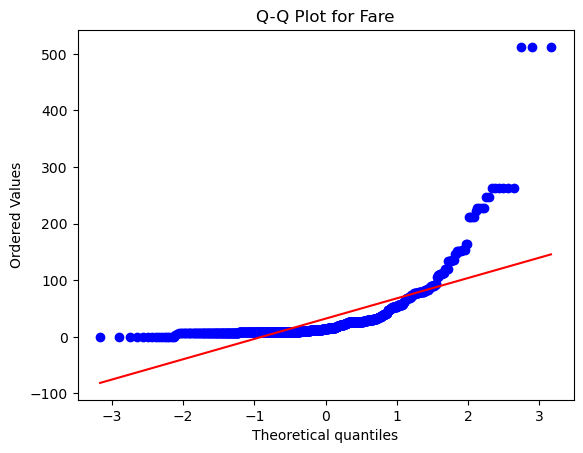

In [20]:
#6
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the provided snippet

# Create a copy of the 'Fare' column to avoid the SettingWithCopyWarning
fare_data = df['Fare'].copy()

# Generate the Q-Q plot for 'Fare'
stats.probplot(fare_data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Fare")
plt.show()


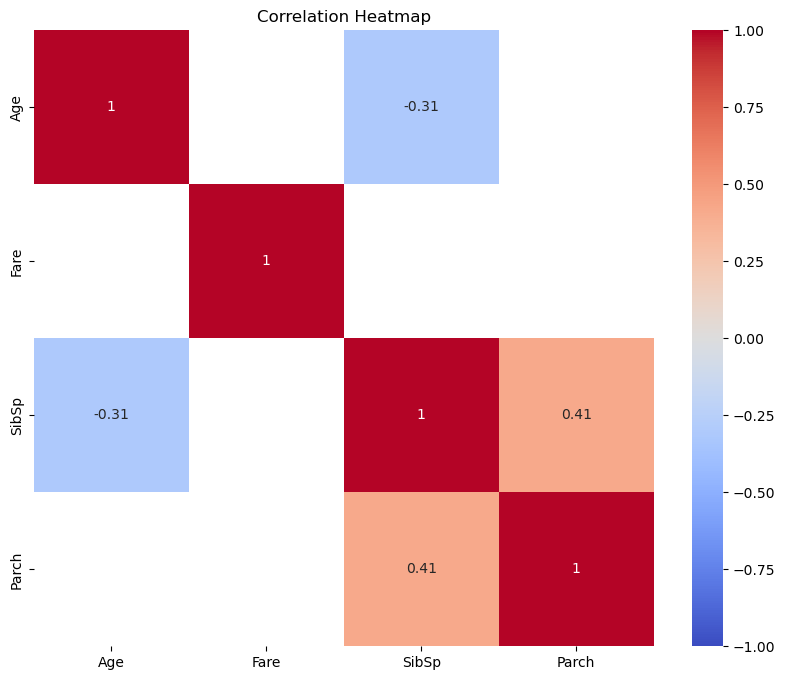

In [37]:
#7
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_data = pd.read_csv("titanic.csv")

# Select numerical columns (excluding PassengerId)
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']

# Calculate the correlation matrix
correlation_matrix = titanic_data[numerical_columns].corr()

# Set a correlation threshold (adjust as needed)
correlation_threshold = 0.3

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            mask=correlation_matrix.abs() <= correlation_threshold)
plt.title("Correlation Heatmap")
plt.show()

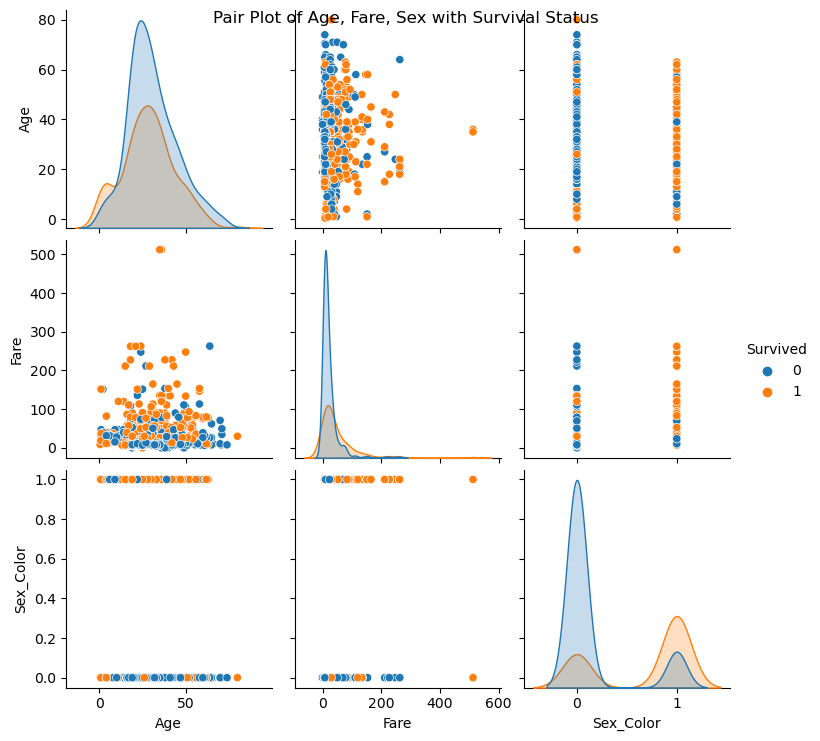

In [27]:
#8
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('titanic.csv')

# Encode 'Sex' as colors
df['Sex_Color'] = df['Sex'].apply(lambda x: 1 if x == 'female' else 0)

# Select the relevant variables
variables = ['Age', 'Fare', 'Sex_Color', 'Survived']

# Create a pairplot
sns.pairplot(df[variables], hue='Survived', diag_kind='kde')
plt.suptitle('Pair Plot of Age, Fare, Sex with Survival Status')
plt.show()



T-statistic: 6.839099259085254
P-value: 2.6993323503141236e-11
Reject null hypothesis: The amount of Fare paid has a significant impact on survival chances.


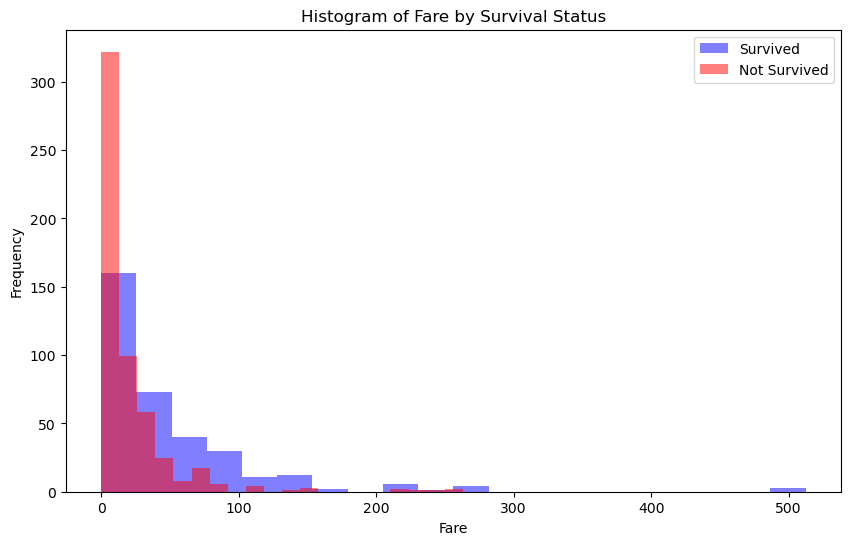

In [25]:
#9
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the provided snippet

# Define null and alternative hypotheses:
# Null Hypothesis (H0): The amount of Fare paid does not have a significant impact on survival chances.
# Alternative Hypothesis (H1): The amount of Fare paid has a significant impact on survival chances.

# Select data for passengers who survived and those who did not
fare_survived = df[df['Survived'] == 1]['Fare']
fare_not_survived = df[df['Survived'] == 0]['Fare']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(fare_survived, fare_not_survived, equal_var=False)

# Define significance level
alpha = 0.05

# Print the t-statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Compare p-value to significance level
if p_value < alpha:
    print("Reject null hypothesis: The amount of Fare paid has a significant impact on survival chances.")
else:
    print("Fail to reject null hypothesis: The amount of Fare paid does not have a significant impact on survival chances.")

# Plot histograms for Fare based on survival status
plt.figure(figsize=(10, 6))
plt.hist(fare_survived, bins=20, alpha=0.5, label='Survived', color='blue')
plt.hist(fare_not_survived, bins=20, alpha=0.5, label='Not Survived', color='red')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Fare by Survival Status')
plt.show()


In [35]:
#10
import numpy as np
from scipy import stats

# Assuming df is your DataFrame with the provided snippet

# Select data for passengers who survived and those who did not
fare_survived = df[df['Survived'] == 1]['Fare']
fare_not_survived = df[df['Survived'] == 0]['Fare']

# Calculate means and standard deviations
mean_survived = fare_survived.mean()
mean_not_survived = fare_not_survived.mean()
std_dev_survived = fare_survived.std()
std_dev_not_survived = fare_not_survived.std()

# Calculate the standard error of the mean difference
n_survived = len(fare_survived)
n_not_survived = len(fare_not_survived)
std_error = np.sqrt((std_dev_survived*2 / n_survived) + (std_dev_not_survived*2 / n_not_survived))

# Set the confidence level (e.g., 95% confidence level)
confidence_level = 0.95

# Calculate the critical value from the t-distribution
degrees_freedom = n_survived + n_not_survived - 2
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha/2, df=degrees_freedom)

# Calculate the margin of error
margin_of_error = t_critical * std_error

# Print the margin of error
print(f"Margin of Error: {margin_of_error}")

Margin of Error: 1.3930609789255537
